In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('D:/Materi Kuliah UNAIR/Semester 5/Pembelajaran Mesin (Praktikum) RK-A2/modified_auto_mpg.csv')

# Display the first few rows of the dataframe to understand its structure
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


In [6]:
    # Convert 'horsepower' to numeric, coercing errors to NaN
    df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')

    # Calculate mean, max, min, and mode for attributes 1-8
    summary_stats = {
        "Mean": df.iloc[:, :8].mean(),
        "Max": df.iloc[:, :8].max(),
        "Min": df.iloc[:, :8].min(),
        "Mode": df.iloc[:, :8].mode().iloc[0]  # Taking the first mode
    }

    # Convert to DataFrame for easier viewing
    summary_stats_df = pd.DataFrame(summary_stats)

    # Diagnose missing values and NaNs
    missing_values = df.iloc[:, :8].isna().sum()

    # Combine the results
    summary_stats_df['Missing Value/NaN'] = missing_values

    # Display the dataframe in the console
    print(summary_stats_df)

    # Optionally, save the dataframe to a CSV file
    summary_stats_df.to_csv('summary_statistics.csv', index=False)


                     Mean     Max     Min    Mode  Missing Value/NaN
mpg             23.514573    46.6     9.0    13.0                  0
cylinders        5.454774     8.0     3.0     4.0                  0
displacement   193.425879   455.0    68.0    97.0                  0
horsepower     104.469388   230.0    46.0   150.0                  6
weight        2970.424623  5140.0  1613.0  1985.0                  0
acceleration    15.568090    24.8     8.0    14.5                  0
model_year      76.010050    82.0    70.0    73.0                  0
origin           1.572864     3.0     1.0     1.0                  0


In [7]:
# Function to calculate outliers using the IQR method
def calculate_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = series[(series < lower_bound) | (series > upper_bound)]
    return len(outliers)

# Applying the outlier calculation for each attribute (1-8)
outliers_count = df.iloc[:, :8].apply(calculate_outliers)

# Convert to DataFrame and display or save
outliers_count_df = outliers_count.to_frame(name='Outliers Count')

# Display the dataframe in the console
print(outliers_count_df)

# Optionally, save the dataframe to a CSV file
outliers_count_df.to_csv('outliers_count.csv', index=False)

              Outliers Count
mpg                        1
cylinders                  0
displacement               0
horsepower                10
weight                     0
acceleration               7
model_year                 0
origin                     0


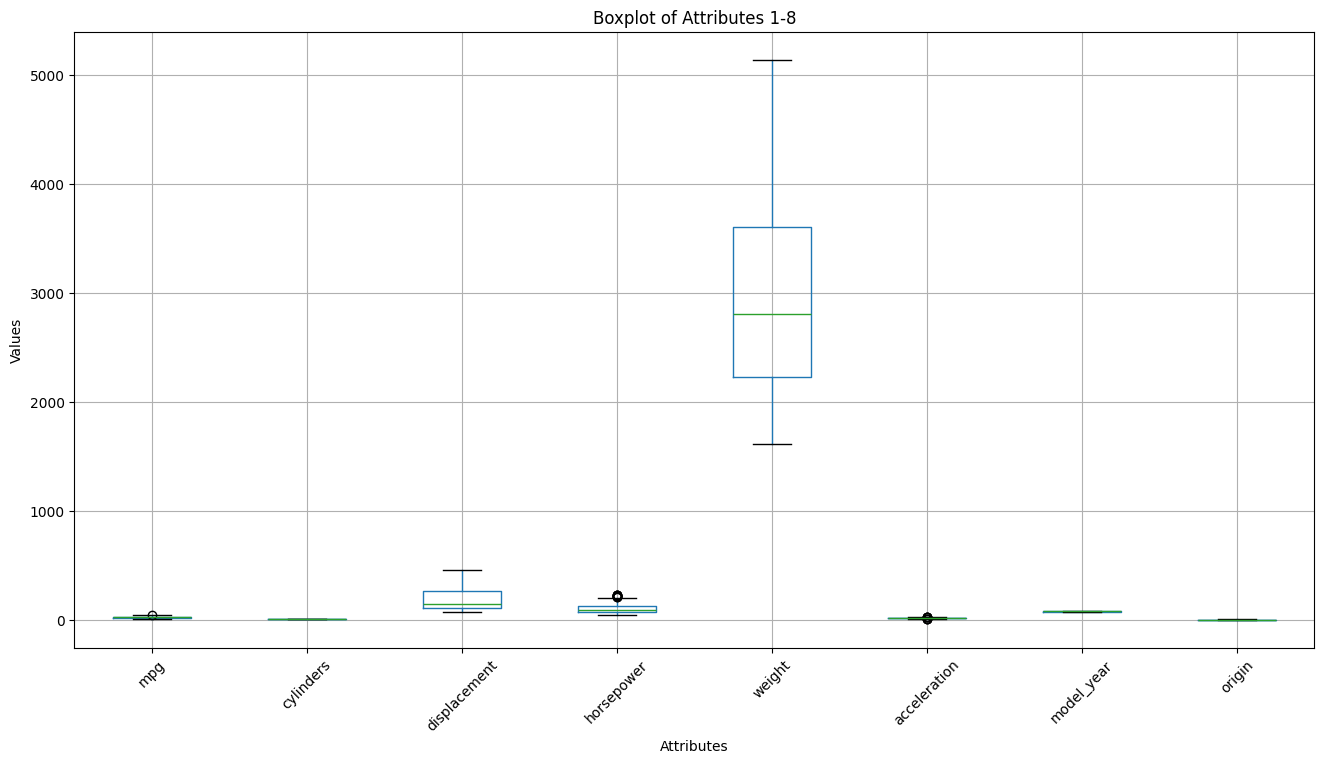

,Outliers Count
mpg,1
cylinders,0
displacement,0
horsepower,10
weight,0
acceleration,7
model_year,0
origin,0


In [8]:
# Create boxplots for each attribute (1-8) to visualize outliers
plt.figure(figsize=(16, 8))
df.iloc[:, :8].boxplot()
plt.title('Boxplot of Attributes 1-8')
plt.ylabel('Values')
plt.xlabel('Attributes')
plt.xticks(rotation=45)
plt.show()

# Display the summary statistics dataframe
summary_stats_df

# Display the outliers count dataframe
outliers_count_df